In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.models as model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv')
df.head()

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [3]:
df = df.drop('row_id', axis=1)

In [4]:
print(df.columns)

Index(['sequence_type', 'sequence_id', 'sequence_counter', 'subject',
       'orientation', 'behavior', 'phase', 'gesture', 'acc_x', 'acc_y',
       ...
       'tof_5_v54', 'tof_5_v55', 'tof_5_v56', 'tof_5_v57', 'tof_5_v58',
       'tof_5_v59', 'tof_5_v60', 'tof_5_v61', 'tof_5_v62', 'tof_5_v63'],
      dtype='object', length=340)


700
29


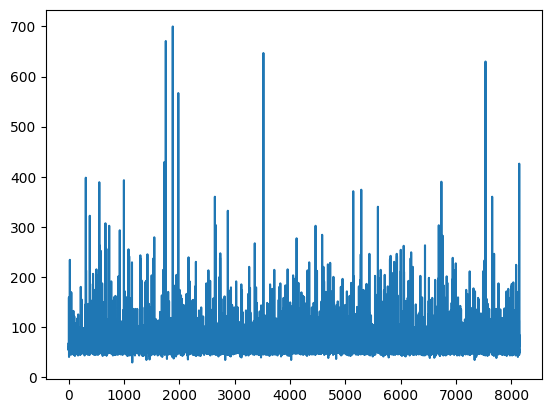

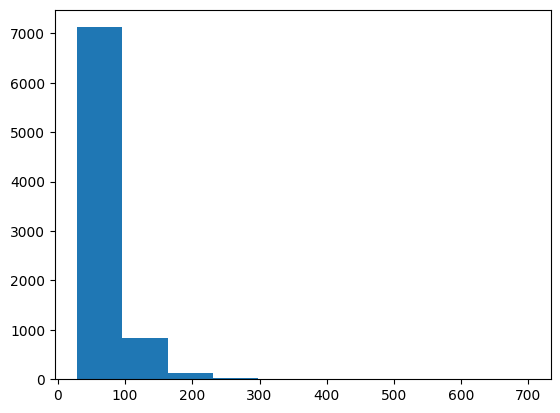

In [5]:
grouped_df = df.groupby('sequence_id')
i = 0

_lgd_list = []
for gd in grouped_df:
    lgd = list(gd)

    # print(lgd[0])

    # print(lgd[0], (lgd[1]))
    _lgd_list.append(len(lgd[1]))    

print(max(_lgd_list))
print(min(_lgd_list))

plt.plot(_lgd_list)
plt.show()

plt.hist(_lgd_list)
plt.show()

# d = list(grouped_df)
# print(d[0], d[1])
# print(len(d))

In [6]:
print(len(_lgd_list))

8151


In [7]:
for gd in grouped_df:
    for col in list(gd)[1].columns:
        print(col)
    break

sequence_type
sequence_id
sequence_counter
subject
orientation
behavior
phase
gesture
acc_x
acc_y
acc_z
rot_w
rot_x
rot_y
rot_z
thm_1
thm_2
thm_3
thm_4
thm_5
tof_1_v0
tof_1_v1
tof_1_v2
tof_1_v3
tof_1_v4
tof_1_v5
tof_1_v6
tof_1_v7
tof_1_v8
tof_1_v9
tof_1_v10
tof_1_v11
tof_1_v12
tof_1_v13
tof_1_v14
tof_1_v15
tof_1_v16
tof_1_v17
tof_1_v18
tof_1_v19
tof_1_v20
tof_1_v21
tof_1_v22
tof_1_v23
tof_1_v24
tof_1_v25
tof_1_v26
tof_1_v27
tof_1_v28
tof_1_v29
tof_1_v30
tof_1_v31
tof_1_v32
tof_1_v33
tof_1_v34
tof_1_v35
tof_1_v36
tof_1_v37
tof_1_v38
tof_1_v39
tof_1_v40
tof_1_v41
tof_1_v42
tof_1_v43
tof_1_v44
tof_1_v45
tof_1_v46
tof_1_v47
tof_1_v48
tof_1_v49
tof_1_v50
tof_1_v51
tof_1_v52
tof_1_v53
tof_1_v54
tof_1_v55
tof_1_v56
tof_1_v57
tof_1_v58
tof_1_v59
tof_1_v60
tof_1_v61
tof_1_v62
tof_1_v63
tof_2_v0
tof_2_v1
tof_2_v2
tof_2_v3
tof_2_v4
tof_2_v5
tof_2_v6
tof_2_v7
tof_2_v8
tof_2_v9
tof_2_v10
tof_2_v11
tof_2_v12
tof_2_v13
tof_2_v14
tof_2_v15
tof_2_v16
tof_2_v17
tof_2_v18
tof_2_v19
tof_2_v20
tof_2_v21
to

# Handle Categorical data

In [8]:
obj_cols = [col for col in df.columns if df[col].dtype == 'object']
print(obj_cols)

['sequence_type', 'sequence_id', 'subject', 'orientation', 'behavior', 'phase', 'gesture']


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

reverse_sequence_type = []
reverse_gesture = []

for col in obj_cols:
    df[col] = encoder.fit_transform(df[col])
    if col == 'sequence_type':
        reverse_sequence_type = list(encoder.classes_)
    elif col == 'gesture':
        reverse_gesture = list(encoder.classes_)

print(df[obj_cols].head())

   sequence_type  sequence_id  subject  orientation  behavior  phase  gesture
0              1            0       73            2         3      1        1
1              1            0       73            2         3      1        1
2              1            0       73            2         3      1        1
3              1            0       73            2         3      1        1
4              1            0       73            2         3      1        1


In [10]:
print(reverse_sequence_type)
print(reverse_gesture)
print(len(reverse_gesture))

['Non-Target', 'Target']
['Above ear - pull hair', 'Cheek - pinch skin', 'Drink from bottle/cup', 'Eyebrow - pull hair', 'Eyelash - pull hair', 'Feel around in tray and pull out an object', 'Forehead - pull hairline', 'Forehead - scratch', 'Glasses on/off', 'Neck - pinch skin', 'Neck - scratch', 'Pinch knee/leg skin', 'Pull air toward your face', 'Scratch knee/leg skin', 'Text on phone', 'Wave hello', 'Write name in air', 'Write name on leg']
18


# Filling Missing Values

In [11]:
df = df.ffill()
print(df.isna().sum())

sequence_type       0
sequence_id         0
sequence_counter    0
subject             0
orientation         0
                   ..
tof_5_v59           0
tof_5_v60           0
tof_5_v61           0
tof_5_v62           0
tof_5_v63           0
Length: 340, dtype: int64


In [12]:
class CMIDataset(Dataset):
    """
        Gives 2 things data and target.
        data contains all the columns except, sequence_type and gesture
        target contains sequence_type and gesture.

        sequence_type has 2 classes: Target (BFRB), Non-Target(Non BFRB)
        gesture
    """
    
    def __init__(self):
        super().__init__()

        self.data = df
        self.data = self.data.groupby('sequence_id')
        self.data = list(self.data)
        

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        d = self.data[idx]
        x = d[1].drop(['sequence_type', 'gesture'], axis=1).values
        y = d[1][['sequence_type', 'gesture']].values

        x = torch.from_numpy(x)
        y = torch.from_numpy(y)

        return x, y[0]

In [13]:
dataset = CMIDataset()

In [14]:
x, y = dataset[0]
print(x, x.shape)
print(y, y.shape)

tensor([[  0.,   0.,  73.,  ...,  -1.,  -1.,  -1.],
        [  0.,   1.,  73.,  ...,  -1.,  -1.,  -1.],
        [  0.,   2.,  73.,  ...,  -1.,  -1.,  -1.],
        ...,
        [  0.,  54.,  73.,  ..., 105.,  98.,  95.],
        [  0.,  55.,  73.,  ..., 102.,  96.,  94.],
        [  0.,  56.,  73.,  ...,  98.,  96.,  94.]], dtype=torch.float64) torch.Size([57, 338])
tensor([1, 1]) torch.Size([2])


In [15]:
from torch.nn.utils.rnn import pad_sequence

def collate_variable_length(batch):
    xs, ys = zip(*batch)  # list of tensors

    lengths = torch.tensor([x.shape[0] for x in xs])  # original sequence lengths
    padded_xs = pad_sequence(xs, batch_first=True)    # shape: [B, T_max, 338]
    ys = torch.stack(ys)                              # shape: [B, 2]

    return padded_xs, lengths, ys

In [16]:
batch_size=16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_variable_length)

In [17]:
for d in dataloader:
    print(type(d))
    print(len(d))
    print(d[0])
    print(d[0].shape)
    print(d[1])
    print(d[1].shape)
    print(d[2])
    print(d[2].shape)
    break

<class 'tuple'>
3
tensor([[[ 7.6020e+03,  0.0000e+00,  2.3000e+01,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 7.6020e+03,  1.0000e+00,  2.3000e+01,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 7.6020e+03,  2.0000e+00,  2.3000e+01,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[ 2.3800e+03,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 2.3800e+03,  1.0000e+00,  0.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 2.3800e+03,  2.0000e+00,  0.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         ...,
       

As each data size is of different size. Thus creating a batched dataset (dataloader) will be difficult. 

### Date: July 2 2025
problem solved using padding.
How it works:
for a given batch, pads all the elements to the max length in that batch.

# Models

We will make our seperate models and train independently. If possible share the architecture.

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNLayer(nn.Module):
    def __init__(self, in_channels, in_shape=8):
        super(CNNLayer, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.AdaptiveAvgPool2d(kernel_size=2, stride=2)

        self.output_len = 64 * (in_shape // 2) * (in_shape // 2)
        
        self.fc = nn.Linear(self.output_len, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = x.view(-1, self.output_len)
        x = self.fc(x)
        
        return x

class CNNAndLSTM(nn.Module):
    def __init__(self, rnn_hidden=64, output_dim=18):
        super(CNNAndLSTM, self).__init__()

        # self.cnn = CNNLayer(5, 8)
        self.rnn = nn.LSTM(input_size=338, hidden_size=rnn_hidden, batch_first=True)
        self.output = nn.Linear(rnn_hidden, output_dim)
        # self.softmax = nn.Softmax(dim=-1)

    def forward(self, x, lengths):
        # cnn_input = x[:, :, -320:]
        # print(x.shape, type(x))
        # print(cnn_input.shape, type(cnn_input))

        B, T, C = x.shape

        packed = nn.utils.rnn.pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, (hn, _) = self.rnn(packed)
        out, _ = nn.utils.rnn.pad_packed_sequence(packed_out, batch_first=True)

        idx = (lengths - 1).unsqueeze(1).unsqueeze(2).expand(B, 1, out.size(2))
        final_hidden = out.gather(1, idx).squeeze(1)
        
        return self.output(final_hidden)

In [19]:
model = CNNAndLSTM()

for x_batch, lengths, y_batch in dataloader:
    x_batch = x_batch.float()
    print(model(x_batch, lengths))
    break

tensor([[ 0.1455, -0.1390,  0.0612,  0.0482, -0.0121,  0.4915, -0.2243,  0.0806,
          0.1153,  0.2787,  0.0123,  0.0934, -0.4770,  0.1382,  0.0738, -0.3263,
          0.2095, -0.1914],
        [-0.1884,  0.0962, -0.0803,  0.1574,  0.0211, -0.0713, -0.0372,  0.0042,
          0.3406, -0.1004,  0.2892,  0.0243, -0.3534,  0.1454, -0.1798, -0.1755,
          0.3606, -0.2946],
        [-0.0414, -0.2626, -0.1128, -0.1578,  0.1668,  0.3644,  0.4237, -0.1353,
          0.3445, -0.1189, -0.0348,  0.2003, -0.2401, -0.0881,  0.0056, -0.1208,
          0.1228, -0.3774],
        [-0.0483, -0.2686, -0.1221,  0.1386,  0.1231,  0.5698, -0.0464,  0.0045,
          0.3246,  0.1765,  0.0314,  0.2625, -0.4665,  0.1049, -0.0080, -0.1551,
          0.2310, -0.7026],
        [-0.1705, -0.0798,  0.3576, -0.2923,  0.2071,  0.4726, -0.2284, -0.0048,
          0.0712,  0.2116, -0.0551,  0.1293, -0.2991,  0.3718,  0.0096,  0.0089,
          0.0235, -0.4160],
        [ 0.1608, -0.1764,  0.1425, -0.0566,  0.43

In [20]:
arr = [1, 2, 3, 4, 5, 6]
print(arr)

print(arr[-6:])

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]


In [21]:
import pandas as pd
from sklearn.metrics import f1_score


class ParticipantVisibleError(Exception):
    """Errors raised here will be shown directly to the competitor."""
    pass


class CompetitionMetric:
    """Hierarchical macro F1 for the CMI 2025 challenge."""
    def __init__(self):
        self.target_gestures = [
            'Above ear - pull hair',
            'Cheek - pinch skin',
            'Eyebrow - pull hair',
            'Eyelash - pull hair',
            'Forehead - pull hairline',
            'Forehead - scratch',
            'Neck - pinch skin',
            'Neck - scratch',
        ]
        self.non_target_gestures = [
            'Write name on leg',s
            'Wave hello',
            'Glasses on/off',
            'Text on phone',
            'Write name in air',
            'Feel around in tray and pull out an object',
            'Scratch knee/leg skin',
            'Pull air toward your face',
            'Drink from bottle/cup',
            'Pinch knee/leg skin'
        ]
        self.all_classes = self.target_gestures + self.non_target_gestures

    def calculate_hierarchical_f1(
        self,
        sol: pd.DataFrame,
        sub: pd.DataFrame
    ) -> float:

        # Validate gestures
        invalid_types = {i for i in sub['gesture'].unique() if i not in self.all_classes}
        if invalid_types:
            raise ParticipantVisibleError(
                f"Invalid gesture values in submission: {invalid_types}"
            )

        # Compute binary F1 (Target vs Non-Target)
        y_true_bin = sol['gesture'].isin(self.target_gestures).values
        y_pred_bin = sub['gesture'].isin(self.target_gestures).values
        f1_binary = f1_score(
            y_true_bin,
            y_pred_bin,
            pos_label=True,
            zero_division=0,
            average='binary'
        )

        # Build multi-class labels for gestures
        y_true_mc = sol['gesture'].apply(lambda x: x if x in self.target_gestures else 'non_target')
        y_pred_mc = sub['gesture'].apply(lambda x: x if x in self.target_gestures else 'non_target')

        # Compute macro F1 over all gesture classes
        f1_macro = f1_score(
            y_true_mc,
            y_pred_mc,
            average='macro',
            zero_division=0
        )

        return 0.5 * f1_binary + 0.5 * f1_macro


def score(
    solution: pd.DataFrame,
    submission: pd.DataFrame,
    row_id_column_name: str
) -> float:
    """
    Compute hierarchical macro F1 for the CMI 2025 challenge.

    Expected input:
      - solution and submission as pandas.DataFrame
      - Column 'sequence_id': unique identifier for each sequence
      - 'gesture': one of the eight target gestures or "Non-Target"

    This metric averages:
    1. Binary F1 on SequenceType (Target vs Non-Target)
    2. Macro F1 on gesture (mapping non-targets to "Non-Target")

    Raises ParticipantVisibleError for invalid submissions,
    including invalid SequenceType or gesture values.


    Examples
    --------
    >>> import pandas as pd
    >>> row_id_column_name = "id"
    >>> solution = pd.DataFrame({'id': range(4), 'gesture': ['Eyebrow - pull hair']*4})
    >>> submission = pd.DataFrame({'id': range(4), 'gesture': ['Forehead - pull hairline']*4})
    >>> score(solution, submission, row_id_column_name=row_id_column_name)
    0.5
    >>> submission = pd.DataFrame({'id': range(4), 'gesture': ['Text on phone']*4})
    >>> score(solution, submission, row_id_column_name=row_id_column_name)
    0.0
    >>> score(solution, solution, row_id_column_name=row_id_column_name)
    1.0
    """
    # Validate required columns
    for col in (row_id_column_name, 'gesture'):
        if col not in solution.columns:
            raise ParticipantVisibleError(f"Solution file missing required column: '{col}'")
        if col not in submission.columns:
            raise ParticipantVisibleError(f"Submission file missing required column: '{col}'")

    metric = CompetitionMetric()
    return metric.calculate_hierarchical_f1(solution, submission)

In [22]:
from sklearn.metrics import f1_score

def get_score(pred, actual):
    target_gestures = [
            'Above ear - pull hair',
            'Cheek - pinch skin',
            'Eyebrow - pull hair',
            'Eyelash - pull hair',
            'Forehead - pull hairline',
            'Forehead - scratch',
            'Neck - pinch skin',
            'Neck - scratch',
        ]
    non_target_gestures = [
        'Write name on leg',
        'Wave hello',
        'Glasses on/off',
        'Text on phone',
        'Write name in air',
        'Feel around in tray and pull out an object',
        'Scratch knee/leg skin',
        'Pull air toward your face',
        'Drink from bottle/cup',
        'Pinch knee/leg skin'
    ]
    all_classes = target_gestures + non_target_gestures

    y_true_bin = [1 if x in (target_gestures) else 0 for x in actual]
    y_pred_bin = [1 if x in (target_gestures) else 0 for x in actual]
    f1_binary = f1_score(
        y_true_bin,
        y_pred_bin,
        pos_label=True,
        zero_division=0,
        average='binary'
    )

    # Compute macro F1 over all gesture classes
    f1_macro = f1_score(
        actual,
        pred,
        average='macro',
        zero_division=0
    )

    return 0.5 * (f1_binary + f1_macro)

    

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [24]:
model = CNNAndLSTM()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [29]:
from tqdm.notebook import tqdm

model = model.to(device)
num_epochs = 100

loss_history = []
score_history = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    all_preds = []
    all_labels = []

    progress_bar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for X_batch, lengths, y_batch in progress_bar:  # <--- Use this!
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        lengths = lengths.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch, lengths)  # Shape: [B, 18]

        targets = y_batch[:, 1].long()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_batch.size(0)

        # Predictions
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        labels = targets.cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(labels)

        # Update tqdm bar
        batch_f1 = get_score(
            [reverse_gesture[p] for p in preds],
            [reverse_gesture[l] for l in labels]
        )
        progress_bar.set_postfix(loss=loss.item(), f1_score=batch_f1)

    # Epoch summary
    avg_epoch_loss = epoch_loss / len(dataloader.dataset)
    epoch_f1 = get_score(
        [reverse_gesture[p] for p in all_preds],
        [reverse_gesture[l] for l in all_labels]
    )

    loss_history.append(avg_epoch_loss)
    score_history.append(epoch_f1)

    print(f"\nEpoch {epoch+1} Summary: Loss = {avg_epoch_loss:.4f}, F1 Score = {epoch_f1:.4f}")

Epoch 1/10:   0%|          | 0/510 [00:00<?, ?it/s]


Epoch 1 Summary: Loss = 2.4448, F1 Score = 0.5632


Epoch 2/10:   0%|          | 0/510 [00:00<?, ?it/s]


Epoch 2 Summary: Loss = 2.3695, F1 Score = 0.5692


Epoch 3/10:   0%|          | 0/510 [00:00<?, ?it/s]


Epoch 3 Summary: Loss = 2.3084, F1 Score = 0.5800


Epoch 4/10:   0%|          | 0/510 [00:00<?, ?it/s]


Epoch 4 Summary: Loss = 2.2761, F1 Score = 0.5858


Epoch 5/10:   0%|          | 0/510 [00:00<?, ?it/s]


Epoch 5 Summary: Loss = 2.2730, F1 Score = 0.5881


Epoch 6/10:   0%|          | 0/510 [00:00<?, ?it/s]


Epoch 6 Summary: Loss = 2.2430, F1 Score = 0.5948


Epoch 7/10:   0%|          | 0/510 [00:00<?, ?it/s]


Epoch 7 Summary: Loss = 2.2072, F1 Score = 0.6026


Epoch 8/10:   0%|          | 0/510 [00:00<?, ?it/s]


Epoch 8 Summary: Loss = 2.1876, F1 Score = 0.6039


Epoch 9/10:   0%|          | 0/510 [00:00<?, ?it/s]


Epoch 9 Summary: Loss = 2.1763, F1 Score = 0.6038


Epoch 10/10:   0%|          | 0/510 [00:00<?, ?it/s]


Epoch 10 Summary: Loss = 2.1411, F1 Score = 0.6094


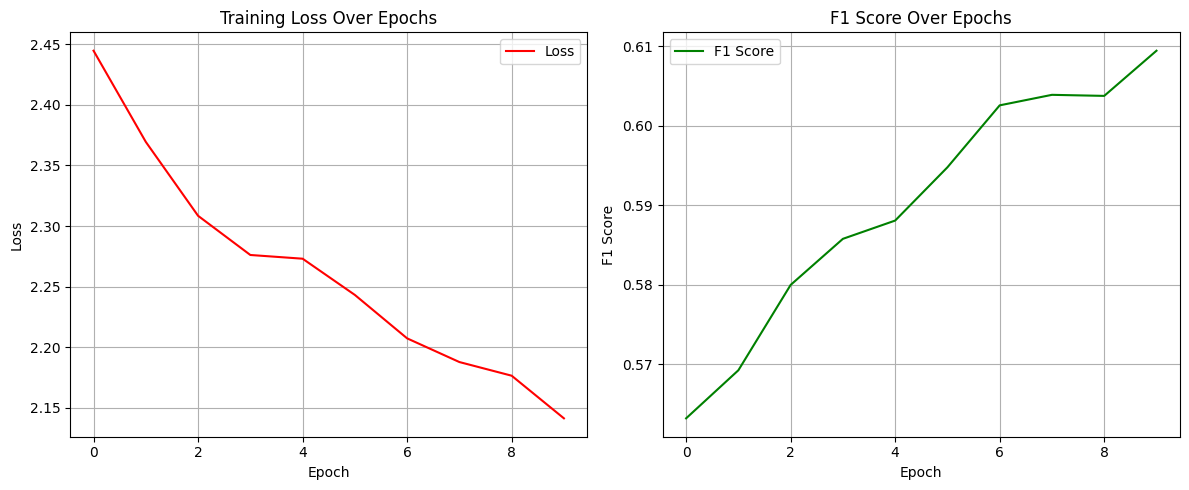

In [30]:
# Plot training loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Loss", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.legend()

# Plot F1 Score
plt.subplot(1, 2, 2)
plt.plot(score_history, label="F1 Score", color="green")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("F1 Score Over Epochs")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()